# SENG 474 - Project
## Data Science Job Salaries
### Chris Colomb (V00970873), Maika Rabenitas (V00970890)

#### Motivation
With the emergence of the AI boom, characterized by rapid advancements in artificial intelligence and machine learning technologies, the relevance and appeal of data science have grown. More individuals are recognizing the potential of data science as a career path, leading to a surge in interest within the field.

In the current job market, the demand for skilled data science professionals is evident across various industries and regions. As organizations increasingly rely on data-driven decision-making processes, the role of data scientists has become indispensable in extracting actionable insights from vast datasets. The intricacies of job salaries within the data science domain reflect a complex interplay of factors such as experience level, employment type, and geographic location.

Moreover, the advent of remote work and flexible arrangements has reshaped traditional notions of workplace dynamics, prompting a reevaluation of compensation models. Analyzing how remote work influences salary determinants offers valuable insights for both employers and employees navigating this evolving landscape.

Furthermore, disparities in compensation based on company size, job title, and employee residence underscore the multifaceted nature of salary determination in data science. Startups may offer competitive salaries to attract top talent, while larger corporations may provide additional perks and benefits. By examining these nuances, our project aims to provide a comprehensive understanding of salary dynamics within the data science industry.

Through data collection, preprocessing, visualization, and mining, our project seeks to uncover patterns and trends that shape salary structures. Ultimately, our endeavor is to contribute to greater transparency and equity in the job market, fostering an environment where both job seekers and employers can make informed decisions.

#### Data Structure Analysis and Visualization

The dataset has total of 12 features. The breakdown of the features is as follows:
- `id`: A unique identifier for each row
- `work_year`: The year the salary was paid
- `experience_level`: EN - Entry Level, MI - Mid Level, SE - Senior Level, EX - Executive Level/Director
- `employment_type`: FT - Full Time, CT - Contract, FL - Freelance
- `job_title`: The role workd in during the year
- `salary`: The total gross salary amount paid
- `salary_currency`: The currency of the salary paid as an ISO 4217 currency code
- `salary_in_usd`: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com)
- `employment_residence`: Employee's primary country of residence in during the work year as an ISO 3166 country code
- `remote_ratio`: The overall amount of work done remotely, possible values are - as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
- `company_location`: The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
- `company_size`: The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

In [1638]:
# import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ds_salary = pd.read_csv("ds_salaries.csv")
ds_salary.head()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [1639]:
ds_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


There are 607 instances in the dataset. We can see that each attribute has 607 non-null values, which means that there are no missing values in the dataset.

In [1640]:
# Shows the summary of the numerical attributes
ds_salary.describe()

,id,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [1641]:
# replace the experience level with the full name for better understanding
ds_salary["experience_level"] = ds_salary["experience_level"].replace("EN", "Entry-Level")
ds_salary["experience_level"] = ds_salary["experience_level"].replace("MI", "Mid-Level")
ds_salary["experience_level"] = ds_salary["experience_level"].replace("SE", "Senior-Level")
ds_salary["experience_level"] = ds_salary["experience_level"].replace("EX", "Executive-Level")

# replace the employment type with the full name for better understanding
ds_salary["employment_type"] = ds_salary["employment_type"].replace("FT", "Full-Time")
ds_salary["employment_type"] = ds_salary["employment_type"].replace("PT", "Part-Time")
ds_salary["employment_type"] = ds_salary["employment_type"].replace("CT", "Contract")
ds_salary["employment_type"] = ds_salary["employment_type"].replace("FL", "Freelance")

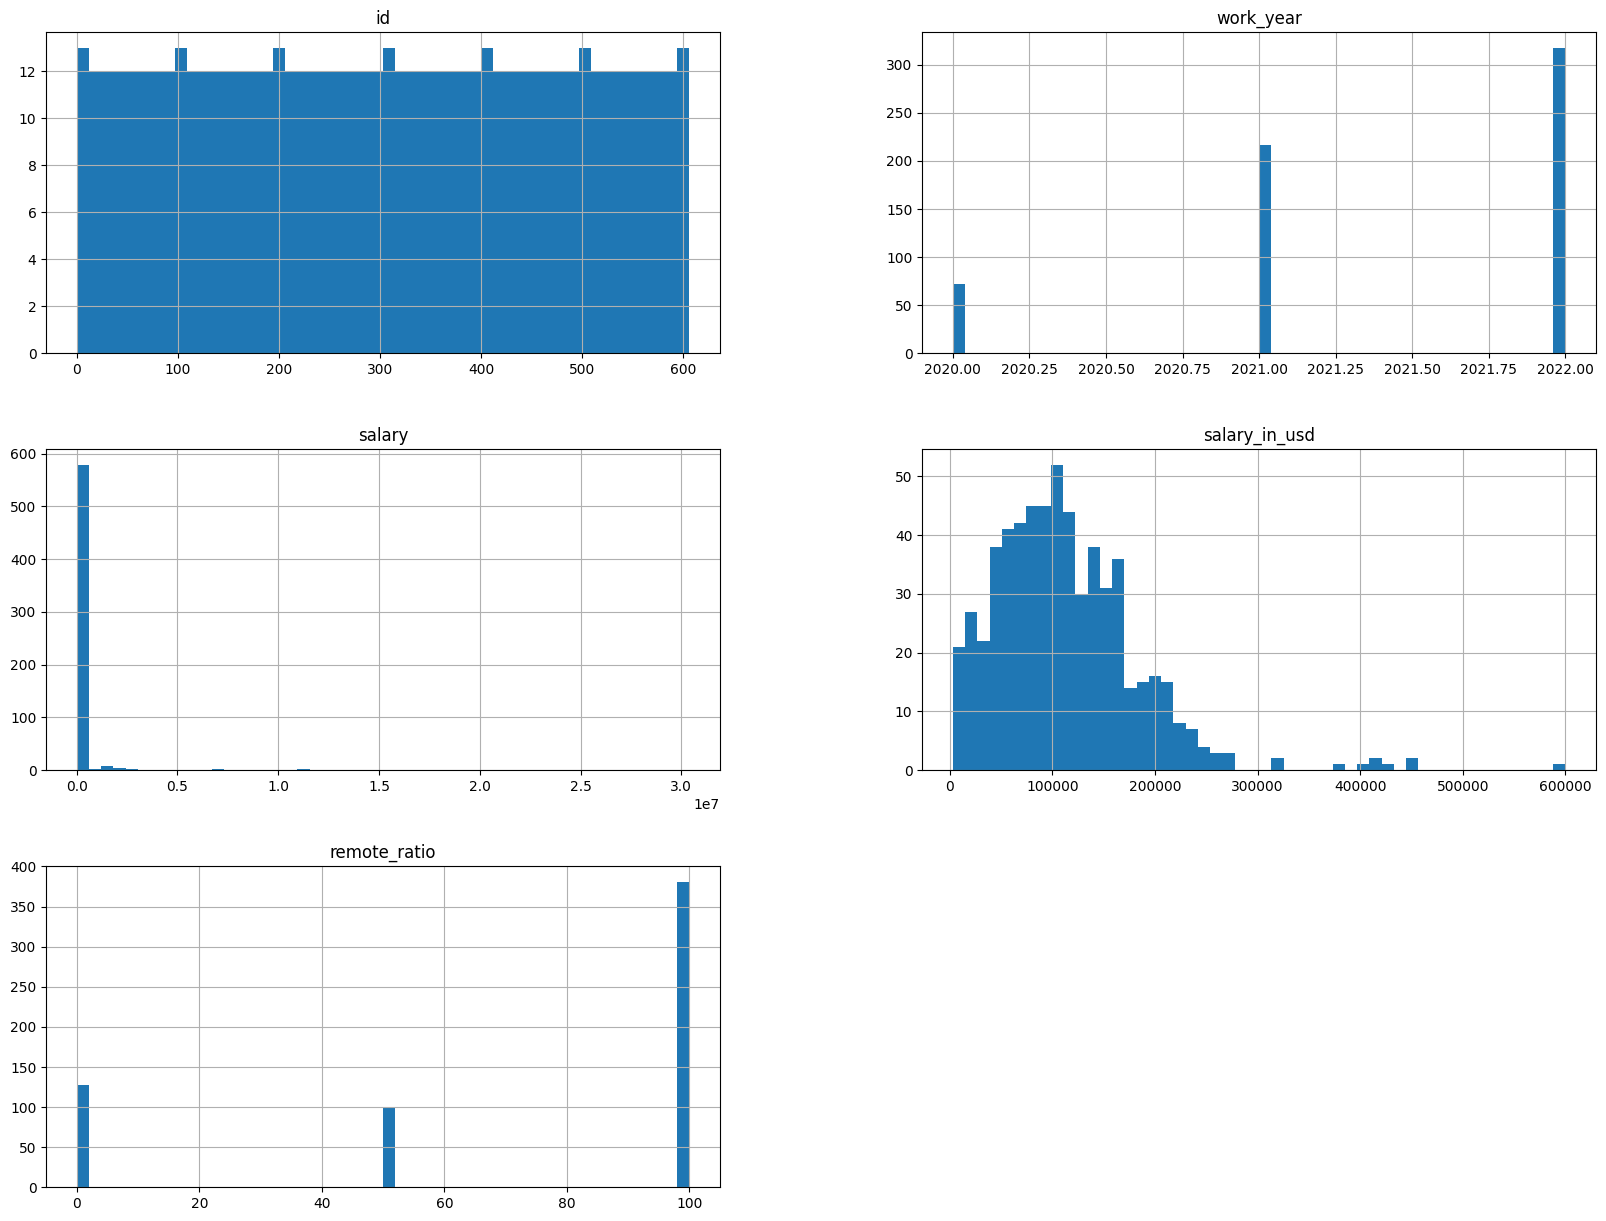

In [1642]:
ds_salary.hist(bins=50,figsize=(20,15))
plt.show()

<Axes: >

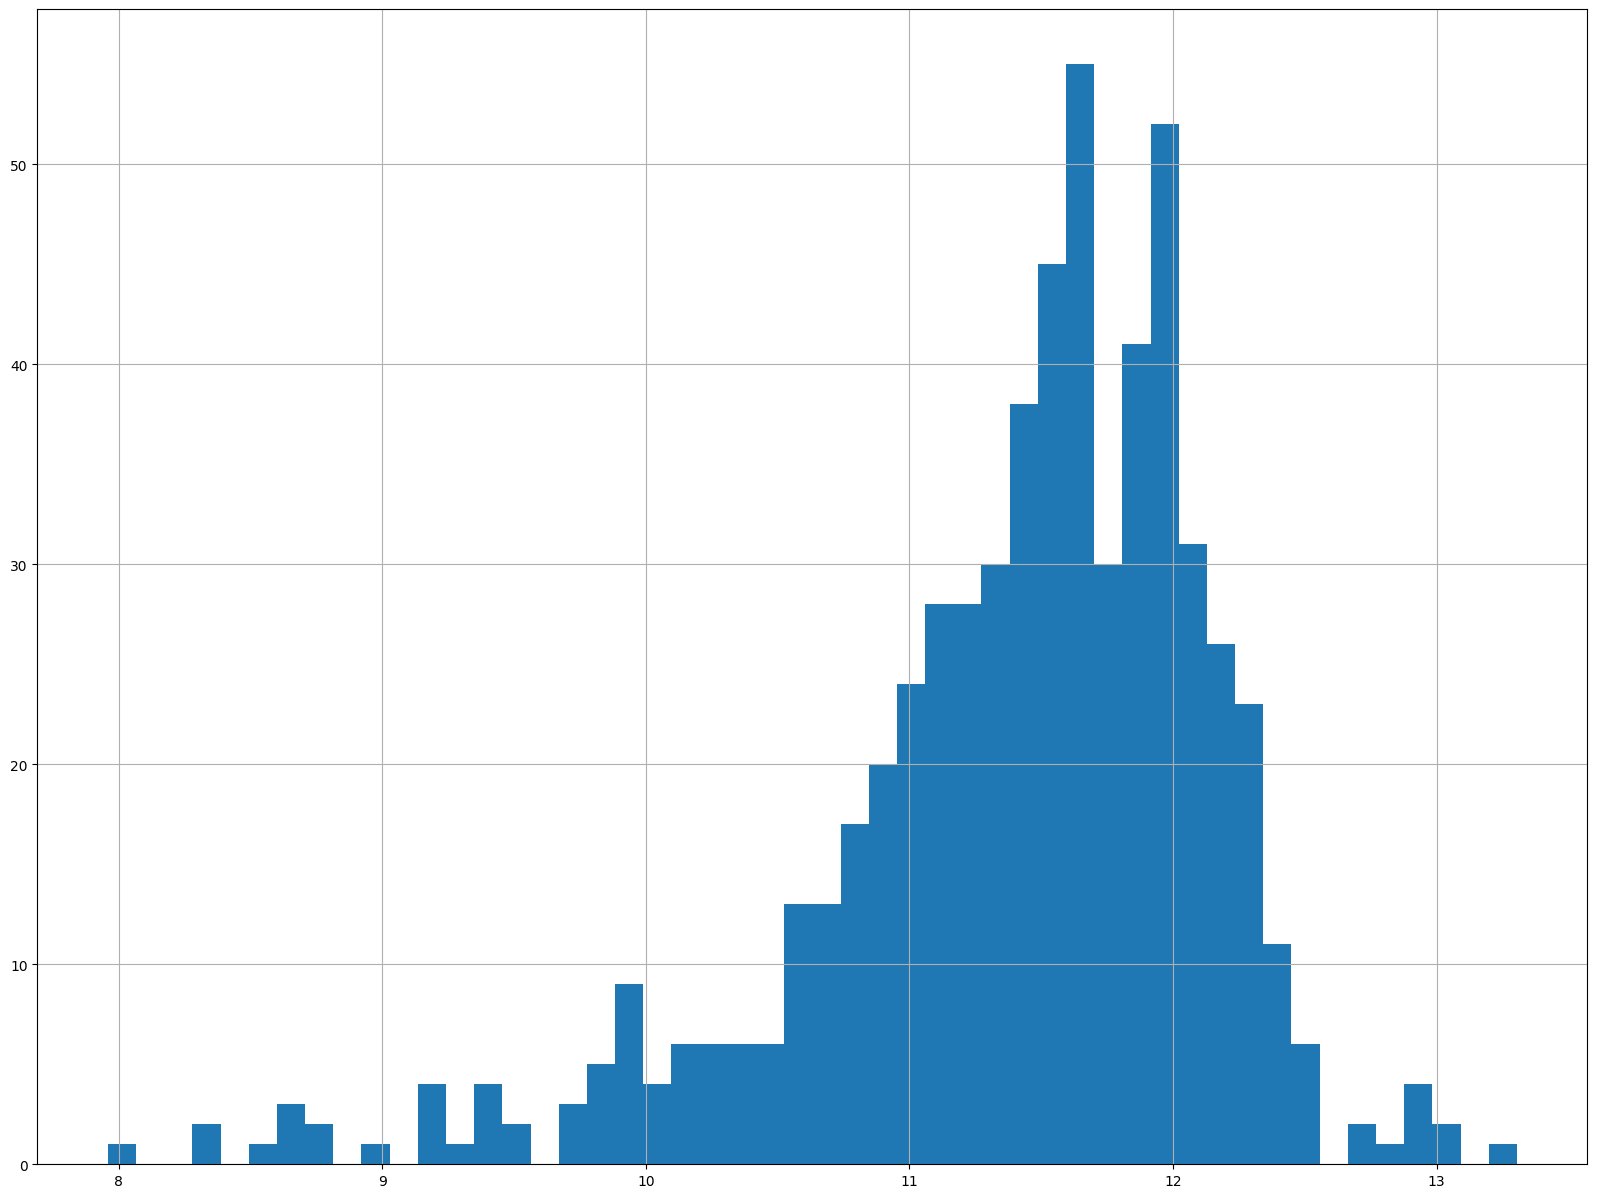

In [1643]:
# apply log transformation to `salary_in_usd` to make it more normally distributed
ds_salary["log_salary"] = np.log(ds_salary["salary_in_usd"])
ds_salary["log_salary"].hist(bins=50,figsize=(20,15))

We will drop the `id` and `salary` columns as they are not useful for our analysis. The `salary` is not useful because the data has different currencies so it is not possible to compare the salaries directly. We will use the `salary_in_usd` column instead. The `id` column is not useful because it is just a unique identifier for each row.

In [1644]:
# drop the id and salary columns
ds_salary = ds_salary.drop("id", axis=1)
ds_salary = ds_salary.drop("salary", axis=1)

ds_salary.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,log_salary
0,2020,Mid-Level,Full-Time,Data Scientist,EUR,79833,DE,0,DE,L,11.287692
1,2020,Senior-Level,Full-Time,Machine Learning Scientist,USD,260000,JP,0,JP,S,12.468437
2,2020,Senior-Level,Full-Time,Big Data Engineer,GBP,109024,GB,50,GB,M,11.599323
3,2020,Mid-Level,Full-Time,Product Data Analyst,USD,20000,HN,0,HN,S,9.903488
4,2020,Senior-Level,Full-Time,Machine Learning Engineer,USD,150000,US,50,US,L,11.918391


In [1645]:
# Explore categorical features
ds_salary["experience_level"].value_counts()

experience_level
Senior-Level       280
Mid-Level          213
Entry-Level         88
Executive-Level     26
Name: count, dtype: int64

In [1646]:
ds_salary["employment_type"].value_counts()

employment_type
Full-Time    588
Part-Time     10
Contract       5
Freelance      4
Name: count, dtype: int64

In [1647]:
ds_salary["job_title"].value_counts()

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                  

In [1648]:
ds_salary["salary_currency"].value_counts()

salary_currency
USD    398
EUR     95
GBP     44
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
CNY      2
MXN      2
HUF      2
DKK      2
SGD      2
BRL      2
AUD      2
CLP      1
CHF      1
Name: count, dtype: int64

In [1649]:
ds_salary["employee_residence"].value_counts()

employee_residence
US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: count, dtype: int64

In [1650]:
ds_salary["company_location"].value_counts()

company_location
US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: count, dtype: int64

In [1651]:
ds_salary["company_size"].value_counts()

company_size
M    326
L    198
S     83
Name: count, dtype: int64

Based on the results we see from the above, we will drop the column `salary_currency` as it is not useful for our analysis because it is hard to compare salaries in differennt currencies. We have a column called `salary_in_usd` which is the salary in USD. We will use this column for our analysis. The currency they use may reflect where they reside in or which country they work from. However, we have a column called `employment_residence` which is the employee's primary country of residence. We will use this column to analyze the salaries based on the country of residence.

From the above, we can observe that out of 607 entries, there are 588 entries where the employees are working full-time and the remaining 19 entries are working as part-time, contract, or freelance. So we can see that majority of the employees are working full-time. Another thing we can observe is that not all employees are working at the same country as the location of their companies. For example, there are 355 employees working for companies in the US but only 332 employees are residing in the US. This means that there are 23 employees who are working for companies in the US but are residing in other countries. Also, we can see that majority of the employees resides and works for the companies in the US. The country with the next highest number of employees is from Great Britain which has 47 employees.  

In [1652]:
# drop the salary_currency column
ds_salary = ds_salary.drop("salary_currency", axis=1)

# check for dropped column
ds_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           607 non-null    int64  
 1   experience_level    607 non-null    object 
 2   employment_type     607 non-null    object 
 3   job_title           607 non-null    object 
 4   salary_in_usd       607 non-null    int64  
 5   employee_residence  607 non-null    object 
 6   remote_ratio        607 non-null    int64  
 7   company_location    607 non-null    object 
 8   company_size        607 non-null    object 
 9   log_salary          607 non-null    float64
dtypes: float64(1), int64(3), object(6)
memory usage: 47.6+ KB


#### Correlations in the Data

In [1653]:
ds_salary.corr(numeric_only=True)

,work_year,salary_in_usd,remote_ratio,log_salary
work_year,1.000000,0.170493,0.076314,0.262747
salary_in_usd,0.170493,1.000000,0.132122,0.855997
remote_ratio,0.076314,0.132122,1.000000,0.143121
log_salary,0.262747,0.855997,0.143121,1.000000


write something about the numeric only values is not good to find correlation in between the data so we have to plot out the categorical

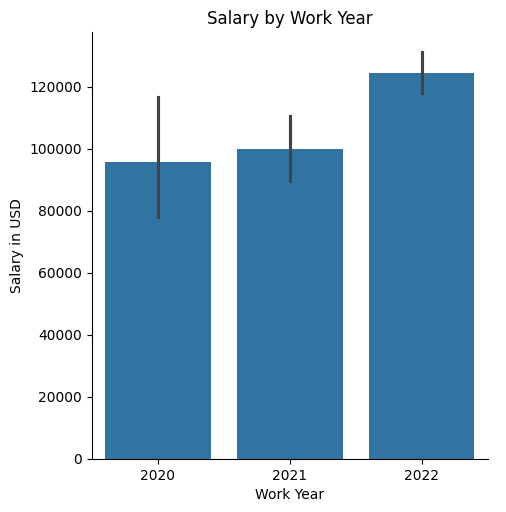

In [1654]:
import seaborn as sns

# Plot `salary_in_usd` vs `work_year`
sns.catplot(x="work_year", y="salary_in_usd", data=ds_salary, kind="bar")

plt.title("Salary by Work Year")
plt.xlabel("Work Year")
plt.ylabel("Salary in USD")

plt.show()

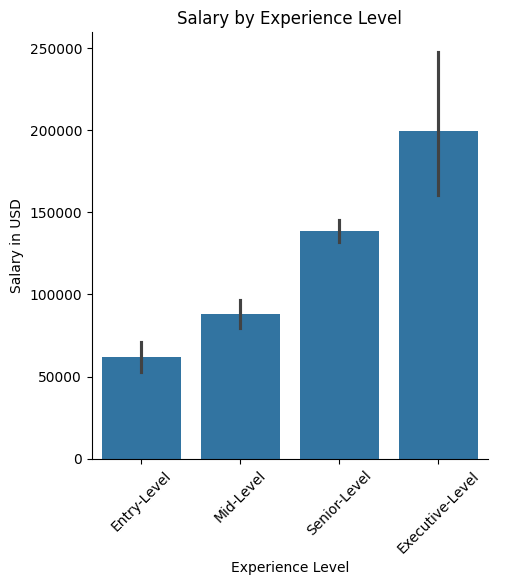

In [1655]:
# Plot `salary_in_usd` vs `experience_level`
sns.catplot(x="experience_level", y="salary_in_usd", data=ds_salary, kind="bar", order=["Entry-Level", "Mid-Level", "Senior-Level", "Executive-Level"])

plt.title("Salary by Experience Level")
plt.xlabel("Experience Level")
plt.xticks(rotation=45)
plt.ylabel("Salary in USD")

plt.show()

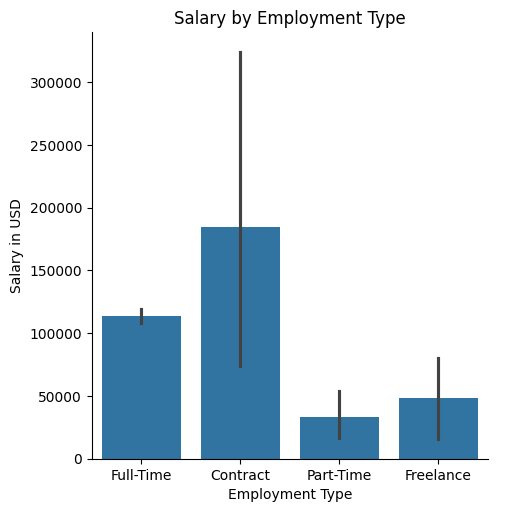

In [1656]:
# Plot `salary_in_usd` vs `employment_type`
sns.catplot(x="employment_type", y="salary_in_usd", data=ds_salary, kind="bar")

plt.title("Salary by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Salary in USD")

plt.show()

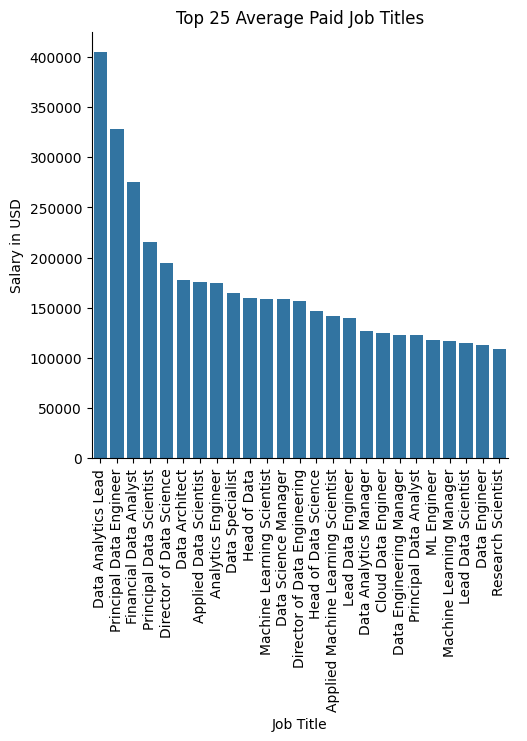

In [1657]:
# Plot top 25 average paid `job_title` order by `salary_in_usd`
top_25_job_titles = ds_salary.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False).head(25)
sns.catplot(x=top_25_job_titles.index, y=top_25_job_titles.values, kind="bar")

plt.title("Top 25 Average Paid Job Titles")
plt.xlabel("Job Title")
plt.xticks(rotation=90)
plt.ylabel("Salary in USD")

plt.show()

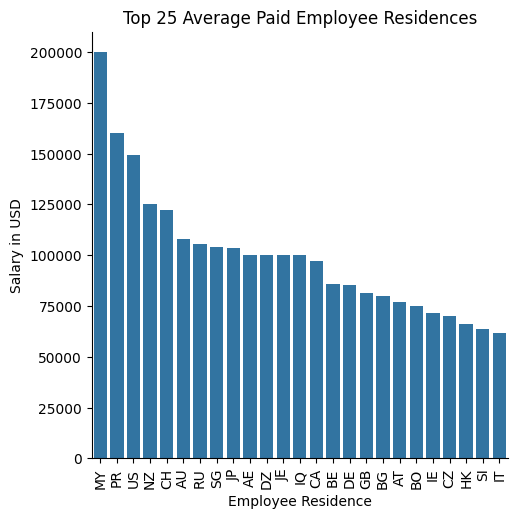

In [1658]:
# Plot top 25 average paid `job_title` order by `salary_in_usd`
top_25_employee_residence = ds_salary.groupby("employee_residence")["salary_in_usd"].mean().sort_values(ascending=False).head(25)
sns.catplot(x=top_25_employee_residence.index, y=top_25_employee_residence.values, kind="bar")

plt.title("Top 25 Average Paid Employee Residences")
plt.xlabel("Employee Residence")
plt.xticks(rotation=90)
plt.ylabel("Salary in USD")

plt.show()

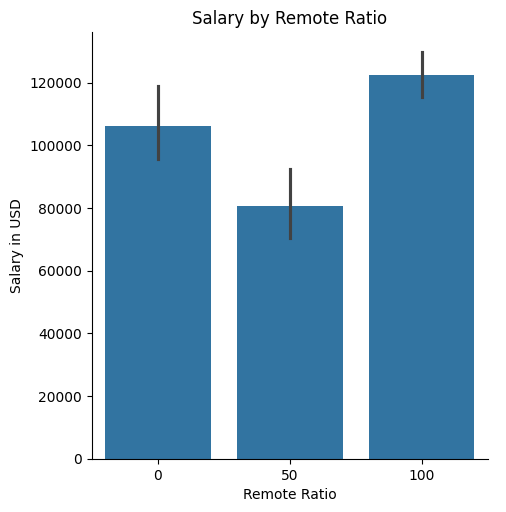

In [1659]:
# Plot `salary_in_usd` vs `remote_ratio`
sns.catplot(x="remote_ratio", y="salary_in_usd", data=ds_salary, kind="bar")

plt.title("Salary by Remote Ratio")
plt.xlabel("Remote Ratio")
plt.ylabel("Salary in USD")

plt.show()

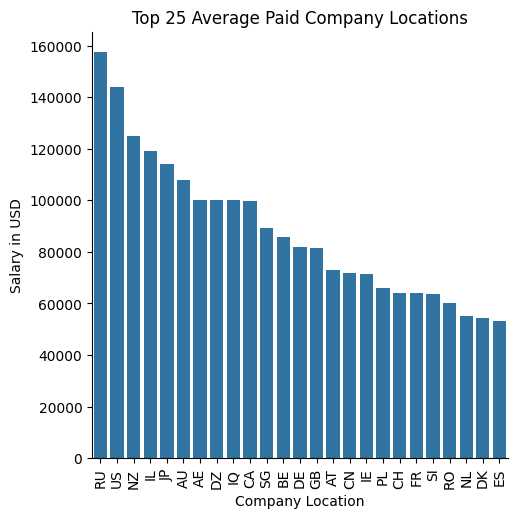

In [1660]:
# Plot top 25 average paid `company_location` order by `salary_in_usd`
top_25_company_location = ds_salary.groupby("company_location")["salary_in_usd"].mean().sort_values(ascending=False).head(25)
sns.catplot(x=top_25_company_location.index, y=top_25_company_location.values, kind="bar")

plt.title("Top 25 Average Paid Company Locations")
plt.xlabel("Company Location")
plt.xticks(rotation=90)
plt.ylabel("Salary in USD")

plt.show()

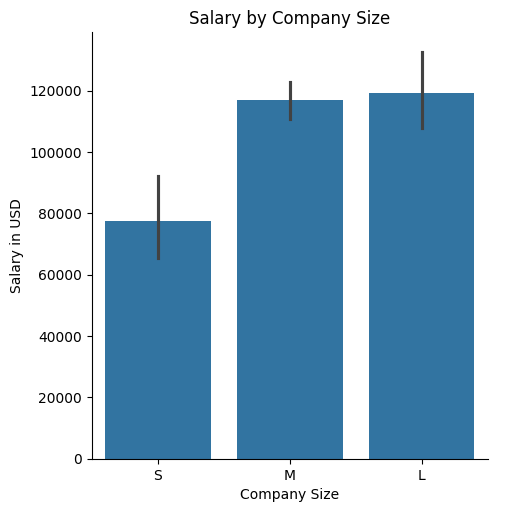

In [1661]:
# Plot `salary_in_usd` vs `company_size`
sns.catplot(x="company_size", y="salary_in_usd", data=ds_salary, kind="bar", order=["S", "M", "L"])

plt.title("Salary by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Salary in USD")

plt.show()

### Handling text and categorical attributes

In [1662]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(ds_salary, test_size=0.2, random_state=42)

len(train_set),len(test_set)

(485, 122)

In [1663]:
# drop the target column(salary_in_usd) from the train_set and save the resulting dataset to a variable called "ds"
# create a copy of the target column(salary_in_usd) and save it to a variable called "ds_labels"
ds = train_set.drop("salary_in_usd", axis=1)
ds_labels = train_set["salary_in_usd"].copy()
ds_labels

9      125000
227     88654
591    144854
516    152500
132     38400
        ...  
71      42197
106    187442
270     72500
435     91614
102     36259
Name: salary_in_usd, Length: 485, dtype: int64

In [1664]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

num_attribs = ["work_year", "remote_ratio"]
cat_attribs = ["job_title", "experience_level", "employment_type", "employee_residence", "company_location", "company_size"]

num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([('num', num_pipeline, num_attribs), ('cat', cat_pipeline, cat_attribs)])

ds_prepared = preprocessing.fit_transform(ds)

print(ds_prepared.shape)
print(preprocessing.get_feature_names_out())


(485, 151)
['num__work_year' 'num__remote_ratio' 'cat__job_title_AI Scientist'
 'cat__job_title_Analytics Engineer'
 'cat__job_title_Applied Data Scientist'
 'cat__job_title_Applied Machine Learning Scientist'
 'cat__job_title_BI Data Analyst' 'cat__job_title_Big Data Architect'
 'cat__job_title_Big Data Engineer' 'cat__job_title_Business Data Analyst'
 'cat__job_title_Cloud Data Engineer'
 'cat__job_title_Computer Vision Engineer'
 'cat__job_title_Computer Vision Software Engineer'
 'cat__job_title_Data Analyst' 'cat__job_title_Data Analytics Engineer'
 'cat__job_title_Data Analytics Lead'
 'cat__job_title_Data Analytics Manager' 'cat__job_title_Data Architect'
 'cat__job_title_Data Engineer' 'cat__job_title_Data Engineering Manager'
 'cat__job_title_Data Science Consultant'
 'cat__job_title_Data Science Engineer'
 'cat__job_title_Data Science Manager' 'cat__job_title_Data Scientist'
 'cat__job_title_Director of Data Engineering'
 'cat__job_title_Director of Data Science' 'cat__job_ti

### Train and Evaulate on the Training Set

In [1665]:
from sklearn.linear_model import LinearRegression

# create a pipeline for preprocessing the data and fitting a linear regression model
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(ds, ds_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['work_year',
                                                   'remote_ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job_title',
                                                   'experience_level',
                                                   'employment_type',
                                                   'employee_residence',
                                                   'company_location',
                                                   'company_size'])])),
                ('linearregression', LinearRegression())])

In [1666]:
salary_predictions = lin_reg.predict(ds)
salary_predictions

array([124993.29050948,  85643.12511084, 182355.86528774, 171726.79940041,
        38396.21282505,  93742.54500853, 154737.20532544, 154737.20532544,
       168925.74558314, 153673.42457513, 140378.55688187, 154737.20532544,
       105802.84531123, 147203.85862538, 154737.20532544,  73124.22175288,
        22850.20644846, 154737.20532544,  92804.770049  ,  25974.07596023,
        13399.78236412, 119232.96501582, 133138.92016676,  89062.63218619,
        40189.34298157, 137516.54167404,  84055.22805719, 180177.65365154,
        89424.08070029,  22568.30112845, 147203.85862538,  72705.63693739,
       147203.85862538, 119232.96501582,  81240.95404291,  86361.67393226,
       146284.91824376,  72005.35707661,  79995.24938092, 154737.20532544,
        66024.40968503,  24952.7165899 ,  32975.37242919, 154737.20532544,
       133773.73892078,  69987.14663144, 111166.41132286, 147203.85862538,
       144427.86076582, 234571.68683925,  47319.32415548, 161404.67835925,
       167378.92015713, 2

In [1667]:
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore")

lin_rmse = mean_squared_error(ds_labels, salary_predictions, squared=False)
lin_rmse

39274.37370980276

In [1668]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(ds_labels, salary_predictions)
mape

32.528584668263704

In [1669]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(lin_reg, ds, ds_labels, scoring="neg_root_mean_squared_error", cv=10)

tree_rmses

array([72243.82514317, 65768.4105163 , 55025.3423453 , 57980.28541556,
       54161.72508904, 65502.83433972, 68793.94404627, 52771.75122608,
       89560.416783  , 76442.58990388])

In [1670]:
np.mean(tree_rmses)

65825.11248083241

In [1671]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, ds, ds_labels, scoring="neg_root_mean_squared_error", cv=10)
np.mean(forest_rmses)

54457.50460472268

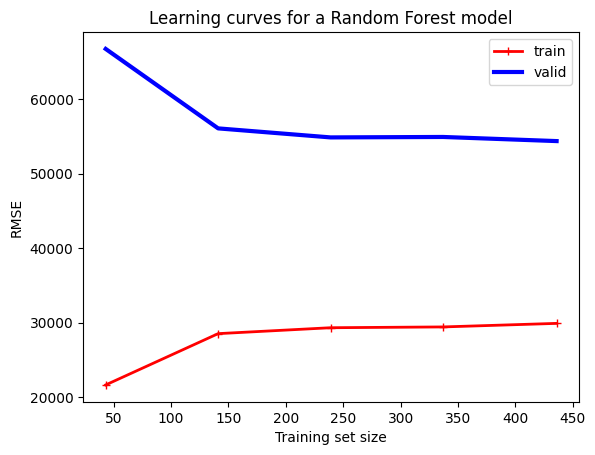

In [1672]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=forest_reg, X=ds, y=ds_labels, cv=10, scoring='neg_root_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, test_scores_mean, "b-", linewidth=3, label="valid")
plt.ylabel('RMSE')
plt.xlabel('Training set size')
plt.title('Learning curves for a Random Forest model')
plt.legend()
plt.show()

In [1673]:
from sklearn.linear_model import SGDRegressor

sgd_reg = make_pipeline(preprocessing, SGDRegressor(max_iter=1000, tol=1e-3))
sgd_rmses = -cross_val_score(sgd_reg, ds, ds_labels, scoring="neg_root_mean_squared_error", cv=200)
np.mean(sgd_rmses)

42689.565080786786

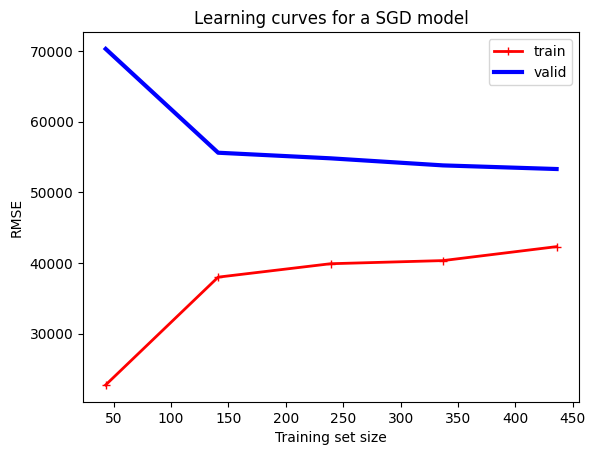

In [1674]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=sgd_reg, X=ds, y=ds_labels, cv=10, scoring='neg_root_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, test_scores_mean, "b-", linewidth=3, label="valid")
plt.ylabel('RMSE')
plt.xlabel('Training set size')
plt.title('Learning curves for a SGD model')
plt.legend()
plt.show()

In [1675]:
from sklearn.linear_model import Ridge

ridge_reg = make_pipeline(preprocessing, Ridge(alpha=1.0))
ridge_rmses = -cross_val_score(ridge_reg, ds, ds_labels, scoring="neg_root_mean_squared_error", cv=10)
np.mean(ridge_rmses)

53951.56392467169

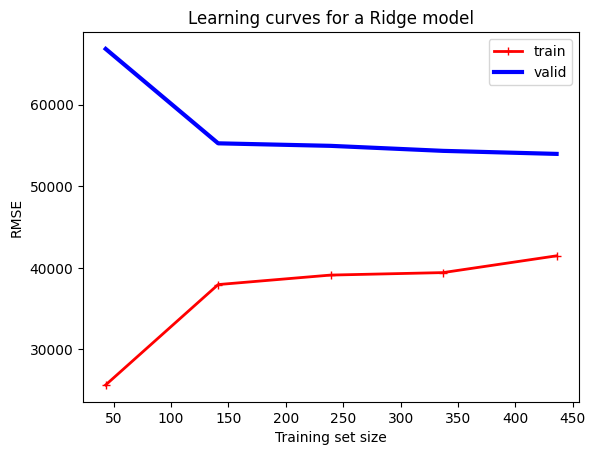

In [1676]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=ridge_reg, X=ds, y=ds_labels, cv=10, scoring='neg_root_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, test_scores_mean, "b-", linewidth=3, label="valid")
plt.ylabel('RMSE')
plt.xlabel('Training set size')
plt.title('Learning curves for a Ridge model')
plt.legend()
plt.show()

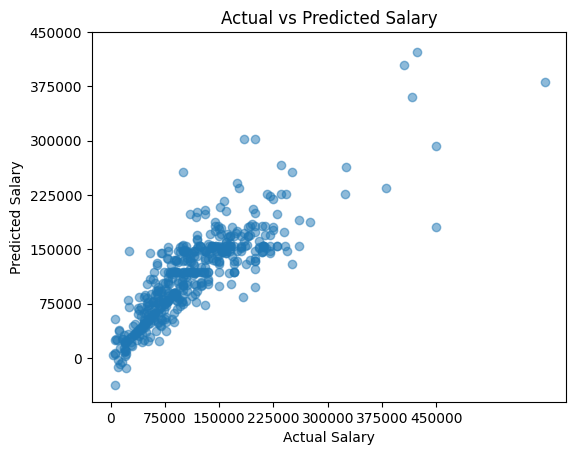

In [1677]:
# scatter plot of actual vs predicted salary
plt.scatter(ds_labels, salary_predictions, alpha=0.5)
# x labels from 0 to 500000 in increments of 75000
plt.xticks(np.arange(0, 500000, step=75000))
# y labels from 0 to 500000 in increments of 75000
plt.yticks(np.arange(0, 500000, step=75000))
# make plot square dimensions
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

### Recategorization for better analysis
Recotegorize data that are skewed. We will apply to the following columns: job_title, employee_residence, company_location and employment_type.

In [1607]:
# make a copy of ds_salary and save it to a variable called "ds_salary_bucket"
ds_salary_bucket = ds_salary.copy()

In [1608]:
# remove all the row in ds_salary_bucket where employee_residence is not equal to "United States" and company_location is not equal to "United States"
ds_salary_bucket = ds_salary_bucket[(ds_salary_bucket["employee_residence"] == "US") & (ds_salary_bucket["company_location"] == "US")]


In [1609]:
# categorize the job_title count less than 10 as "Other"
ds_salary_bucket["job_title"] = ds_salary_bucket["job_title"].apply(lambda x: x if ds_salary_bucket["job_title"].value_counts()[x] > 10 else "Other")

ds_salary_bucket["job_title"].value_counts()

job_title
Other                        84
Data Engineer                82
Data Scientist               78
Data Analyst                 70
Machine Learning Engineer    16
Name: count, dtype: int64

In [1610]:
# categorize the employee_residence count less than 10 as "Other"
# ds_salary["employee_residence"] = ds_salary["employee_residence"].apply(lambda x: x if ds_salary["employee_residence"].value_counts()[x] > 10 else "Other")

ds_salary_bucket["employee_residence"].value_counts()

employee_residence
US    330
Name: count, dtype: int64

In [1611]:
# ds_salary["company_location"] = ds_salary["company_location"].apply(lambda x: x if ds_salary["company_location"].value_counts()[x] > 10 else "Other")

ds_salary_bucket["company_location"].value_counts()

company_location
US    330
Name: count, dtype: int64

In [1612]:
# combine the contract and freelance employment type to "Contract/Freelance"
# ds_salary_bucket["employment_type"] = ds_salary_bucket["employment_type"].apply(lambda x: "Contract/Freelance" if x in ["Contract", "Freelance"] else x)
# remove rows where employment_type is "Contract" and "Freelance"
ds_salary_bucket = ds_salary_bucket[(ds_salary_bucket["employment_type"] != "Contract") & (ds_salary_bucket["employment_type"] != "Freelance")]

ds_salary_bucket["employment_type"].value_counts()

employment_type
Full-Time    326
Name: count, dtype: int64

In [1613]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(ds_salary_bucket, test_size=0.2, random_state=42)

len(train_set),len(test_set)

(260, 66)

In [1614]:
# drop the target column(salary_in_usd) from the train_set and save the resulting dataset to a variable called "ds"
# create a copy of the target column(salary_in_usd) and save it to a variable called "ds_labels"
ds_bucket = train_set.drop("salary_in_usd", axis=1)
ds_bucket_labels = train_set["salary_in_usd"].copy()
ds_bucket_labels

387    164000
57     118000
74     235000
323    180000
296    102100
        ...  
394    145000
178     81000
289    135000
546    110500
275    100000
Name: salary_in_usd, Length: 260, dtype: int64

In [1615]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

num_attribs = ["work_year", "remote_ratio"]
cat_attribs = ["job_title", "experience_level", "employment_type", "employee_residence", "company_location", "company_size"]

num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([('num', num_pipeline, num_attribs), ('cat', cat_pipeline, cat_attribs)])

ds_bucket_prepared = preprocessing.fit_transform(ds_bucket)

print(ds_bucket_prepared.shape)
print(preprocessing.get_feature_names_out())


(260, 17)
['num__work_year' 'num__remote_ratio' 'cat__job_title_Data Analyst'
 'cat__job_title_Data Engineer' 'cat__job_title_Data Scientist'
 'cat__job_title_Machine Learning Engineer' 'cat__job_title_Other'
 'cat__experience_level_Entry-Level'
 'cat__experience_level_Executive-Level' 'cat__experience_level_Mid-Level'
 'cat__experience_level_Senior-Level' 'cat__employment_type_Full-Time'
 'cat__employee_residence_US' 'cat__company_location_US'
 'cat__company_size_L' 'cat__company_size_M' 'cat__company_size_S']


In [1616]:
from sklearn.linear_model import LinearRegression

# create a pipeline for preprocessing the data and fitting a linear regression model
lin_reg_b = make_pipeline(preprocessing, LinearRegression())
lin_reg_b.fit(ds_bucket, ds_bucket_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['work_year',
                                                   'remote_ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job_title',
                                                   'experience_level',
                                                   'employment_type',
                                                   'employee_residence',
                                                   'company_location',
                                                   'company_size'])])),
                ('linearregression', LinearRegression())])

In [1617]:
salary_predictions_b = lin_reg_b.predict(ds_bucket)
salary_predictions_b

array([106240., 134144., 240128., 164352., 118528.,  92160., 173824.,
       147456., 118528., 106240., 118528., 156672., 156672., 118016.,
       150272., 167680., 159488., 118528., 118528., 185856., 156672.,
       108544., 161536.,  92160., 137216., 147456., 181504., 175872.,
       156672., 118528., 193792., 118528., 118528., 167424., 193792.,
       167424., 133376., 156672., 143104., 218112., 118528., 134912.,
       147456., 147456., 167680., 165632., 174336., 118528., 134912.,
       134144., 156672., 146176., 181504., 146944., 155136., 193792.,
       143104., 154112., 121088., 169472., 133376., 193792., 200960.,
       155136.,  48384.,  88320., 137472., 118016., 167680., 147456.,
       134912., 156672., 147456., 167680., 164352., 171776., 118528.,
        92160., 159488., 118528., 118528., 147456., 164352., 134912.,
       149248., 156672., 147456., 147456., 121088., 106240., 156672.,
       147456., 156672., 118528., 118528., 145664., 147456., 144128.,
       164096., 1566

In [1618]:
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore")

lin_rmse_b = mean_squared_error(ds_bucket_labels, salary_predictions_b, squared=False)
lin_rmse_b

49442.11388062423

In [1619]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(ds_bucket_labels, salary_predictions_b)
mape

26.465839151725508

In [1620]:
from sklearn.model_selection import cross_val_score

tree_rmses_b = -cross_val_score(lin_reg_b, ds_bucket, ds_bucket_labels, scoring="neg_root_mean_squared_error", cv=10)

tree_rmses_b

array([86131.42921498, 49524.8481429 , 38679.82156078, 52959.30937885,
       38219.62705661, 39149.86734873, 47985.90727094, 53810.68100473,
       29817.10671358, 63019.86506436])

In [1621]:
np.mean(tree_rmses_b)

49929.846275645876

In [1622]:
forest_reg_b = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmses_b = -cross_val_score(forest_reg_b, ds_bucket, ds_bucket_labels, scoring="neg_root_mean_squared_error", cv=10)
np.mean(forest_rmses_b)

54021.69424744773

In [1623]:
# mape for random forest model
mape_forest = mean_absolute_percentage_error(ds_bucket_labels, salary_predictions_b)
mape_forest

26.465839151725508

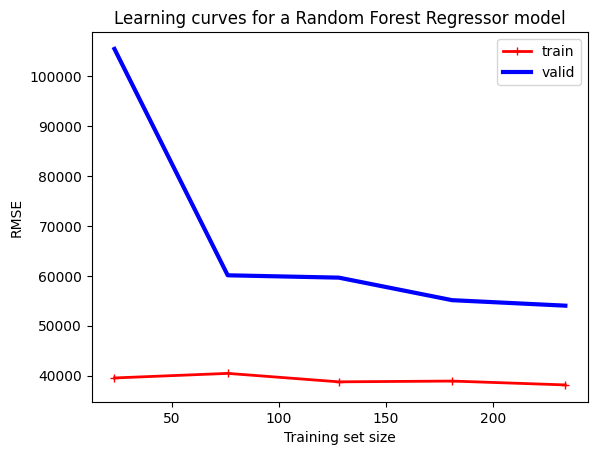

In [1624]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=forest_reg_b, X=ds_bucket, y=ds_bucket_labels, cv=10, scoring='neg_root_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, test_scores_mean, "b-", linewidth=3, label="valid")
plt.ylabel('RMSE')
plt.xlabel('Training set size')
plt.title('Learning curves for a Random Forest Regressor model')
plt.legend()
plt.show()

In [1625]:
sgd_reg_b = make_pipeline(preprocessing, SGDRegressor(max_iter=1000, tol=1e-3))
sgd_rmses_b = -cross_val_score(sgd_reg_b, ds_bucket, ds_bucket_labels, scoring="neg_root_mean_squared_error", cv=10)
np.mean(sgd_rmses_b)
# fit the model
sgd_reg_b.fit(ds_bucket, ds_bucket_labels)
# make predictions
salary_predictions_sgd = sgd_reg_b.predict(ds_bucket)

In [1626]:
# mape for sgd regression model
mape_sgd = mean_absolute_percentage_error(ds_bucket_labels, salary_predictions_sgd)
mape_sgd

26.95105611091867

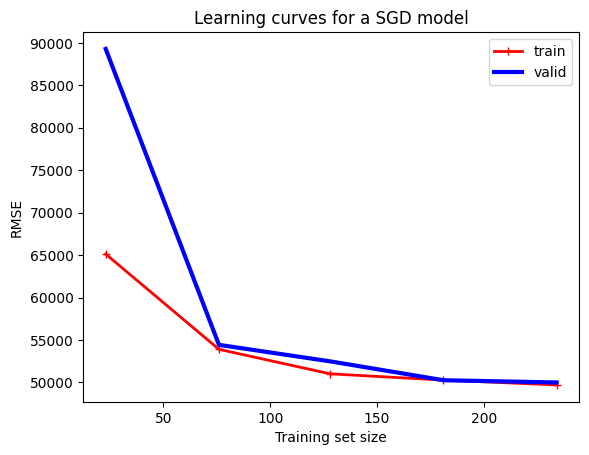

In [1627]:
train_sizes, train_scores, test_scores = learning_curve(estimator=sgd_reg_b, X=ds_bucket, y=ds_bucket_labels, cv=10, scoring='neg_root_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, test_scores_mean, "b-", linewidth=3, label="valid")
plt.ylabel('RMSE')
plt.xlabel('Training set size')
plt.title('Learning curves for a SGD model')
plt.legend()
plt.show()

In [1628]:
from sklearn.linear_model import Ridge

ridge_reg_b = make_pipeline(preprocessing, Ridge(alpha=1.0))
ridge_rmses_b = -cross_val_score(ridge_reg_b, ds_bucket, ds_bucket_labels, scoring="neg_root_mean_squared_error", cv=10)
np.mean(ridge_rmses_b)

49683.29962402934

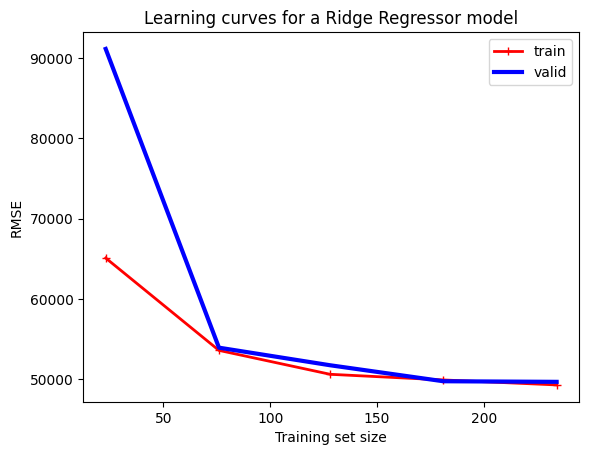

In [1629]:
train_sizes, train_scores, test_scores = learning_curve(estimator=ridge_reg_b, X=ds_bucket, y=ds_bucket_labels, cv=10, scoring='neg_root_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, test_scores_mean, "b-", linewidth=3, label="valid")
plt.ylabel('RMSE')
plt.xlabel('Training set size')
plt.title('Learning curves for a Ridge Regressor model')
plt.legend()
plt.show()

In [1630]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import svm

log_reg = make_pipeline(preprocessing, LogisticRegression())
log_reg.fit(ds, ds_labels)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['work_year',
                                                   'remote_ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job_title',
                                                   'experience_level',
                                                   'employment_type',
                                                   'employee_residence',
                                                   'company_location',
                                                   'company_size'])])),
                ('logisticregression', LogisticRegression())])

In [1631]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define categorical columns
categorical_cols = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']

# Define numerical columns
numerical_cols = ['work_year', 'remote_ratio']

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)])

# Define SVM classifier
svm_clf = svm.SVC(kernel='poly')

# Create a pipeline that preprocesses the data and then fits the classifier
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', svm_clf)])

# Assuming `X` is your feature data and `y` are your labels
X_train, X_test, y_train, y_test = train_test_split(ds, ds_labels, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['work_year',
                                                   'remote_ratio']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['experience_level',
                                                   'employment_type',
                                                   'job_title',
                                                   'employee_residence',
                                                   'company_location',
                                                   'company_size'])])),
                ('classifier', SVC(kernel='poly'))])

In [1632]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy}")

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"Test set RMSE: {rmse}")

# Use the model to make predictions on new data
# Assuming `X_new` is your new data
# Define a single new sample
X_new = pd.DataFrame([{
    'work_year': 2022,
    'experience_level': 'Mid-Level',
    'employment_type': 'Full-Time',
    'job_title': 'Data Engineer',
    'employee_residence': 'US',
    'remote_ratio': 0.5,
    'company_location': 'US',
    'company_size': 'S'
}])

# Make predictions on the new sample
predictions = model.predict(X_new)
print(f"Predictions: {predictions}")

Test set accuracy: 0.041237113402061855
Test set RMSE: 63355.56838317086
Predictions: [120000]


In [1633]:
ds_salary_bucket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 326 entries, 4 to 605
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           326 non-null    int64  
 1   experience_level    326 non-null    object 
 2   employment_type     326 non-null    object 
 3   job_title           326 non-null    object 
 4   salary_in_usd       326 non-null    int64  
 5   employee_residence  326 non-null    object 
 6   remote_ratio        326 non-null    int64  
 7   company_location    326 non-null    object 
 8   company_size        326 non-null    object 
 9   log_salary          326 non-null    float64
dtypes: float64(1), int64(3), object(6)
memory usage: 28.0+ KB


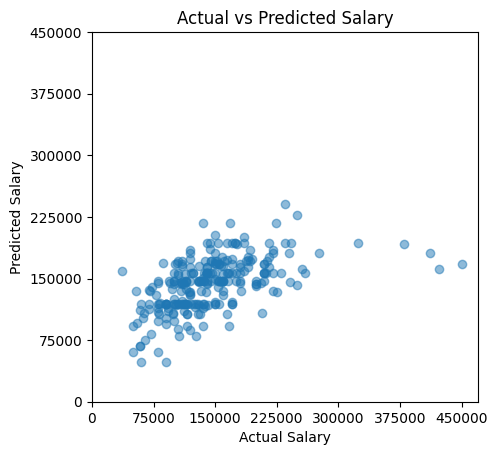

In [1637]:
# scatter plot of actual vs predicted salary
plt.scatter(ds_bucket_labels, salary_predictions_b, alpha=0.5)
# x labels from 0 to 500000 in increments of 75000
plt.xticks(np.arange(0, 500000, step=75000))
# y labels from 0 to 500000 in increments of 75000
plt.yticks(np.arange(0, 500000, step=75000))
# make plot square dimensions
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()